In [170]:
# Importing the neccesarries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os

In [171]:
# Importing the data from local
bnkA = pd.read_csv('bank-additional-full.csv', delimiter = ';')

In [172]:
bnkA.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [173]:
# Getting the dimensions of the dataset
bnkA.shape

(41188, 21)

In [174]:
# Getting the information 
bnkA.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [175]:
# Replacing unknown values or the place holders with the NULL
bnkA['pdays'] = bnkA['pdays'].replace(999,np.nan)
bnkA = bnkA.replace('unknown',np.nan)

In [176]:
# getting the count of null values
(bnkA.isnull().sum()/len(bnkA)) 

age               0.000000
job               0.008012
marital           0.001942
education         0.042027
default           0.208726
housing           0.024036
loan              0.024036
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.963217
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

In [177]:
# Dropping columns with 80% of the records with null values
bnkA = bnkA.dropna(axis = 1, thresh = len(bnkA)*0.80) 

In [178]:
bnkA.head(10)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,telephone,may,mon,198,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,no,no,telephone,may,mon,217,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,yes,no,telephone,may,mon,380,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,yes,no,telephone,may,mon,50,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [179]:
#dropping null in all columns
bnkA= bnkA.dropna() 

In [180]:
# getting the count of null values after removing the null values
(bnkA.isnull().sum()/len(bnkA))*100 

age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [181]:
 # Replacing the special characters
bnkA['job'] = bnkA['job'].replace('.',' ')

<ipython-input-181-35603bbdbf64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bnkA['job'] = bnkA['job'].replace('.',' ')


In [182]:
bnkA.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,258.207583,2.566662,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,259.792638,2.767473,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [183]:
#cartegorical columns
catVar = bnkA.columns[bnkA.dtypes == 'object'].tolist() 
#numerical columns
numVar = bnkA.columns[bnkA.dtypes != 'object'].tolist() 
catVar.remove('y')

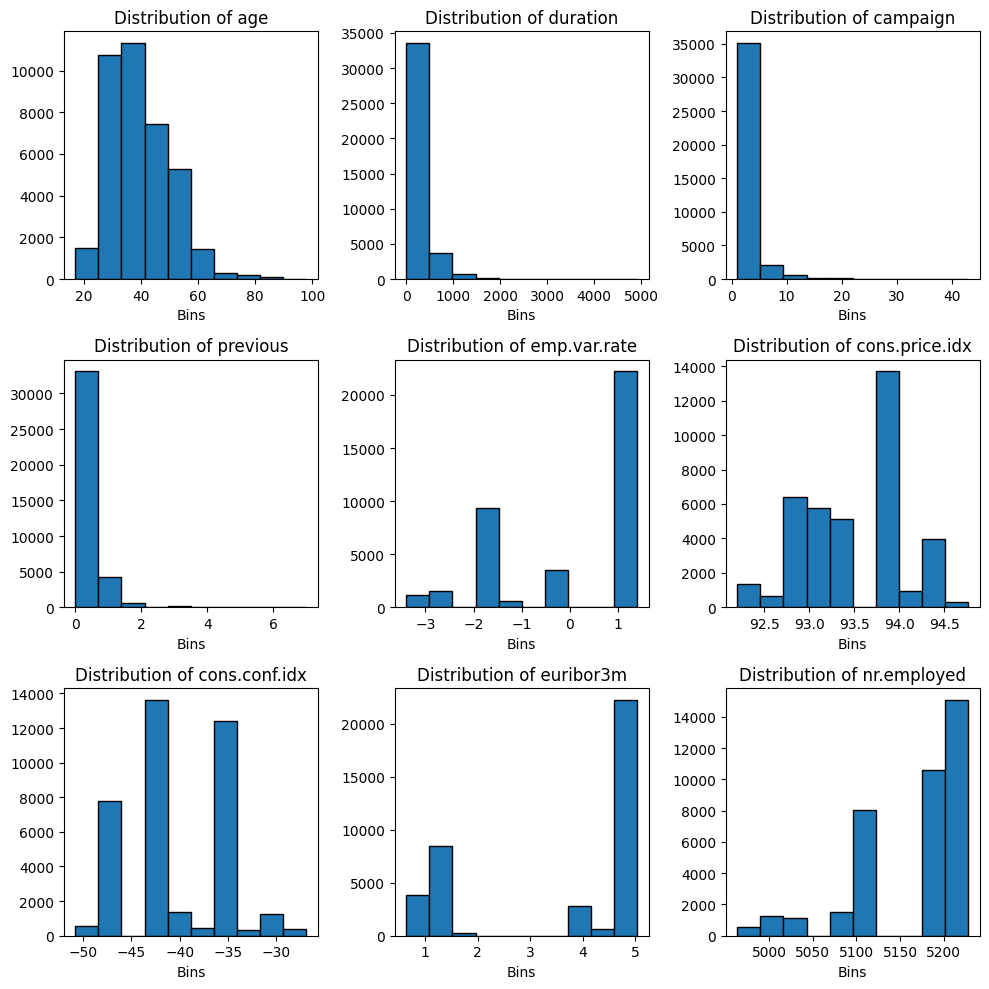

In [184]:
# Plotting the distribution of the numerical columns
fig, ax = plt.subplots(3,3, figsize=(10,10))
index = 0
for i in range(3):
  for j in range(3):
    ax[i,j].hist(bnkA[numVar[index]], edgecolor='black') # plotting the histogram
    ax[i,j].set_title("Distribution of "+str(numVar[index])) # setting the titles
    ax[i,j].set_xlabel('Bins')
    index = index + 1
plt.tight_layout()
plt.show()

In [185]:
# Getting the count w.r.t job discription
bnkA.groupby('job')['age'].count() 

job
admin.           9937
blue-collar      8560
entrepreneur     1360
housemaid         987
management       2728
retired          1577
self-employed    1349
services         3716
student           688
technician       6380
unemployed        963
Name: age, dtype: int64

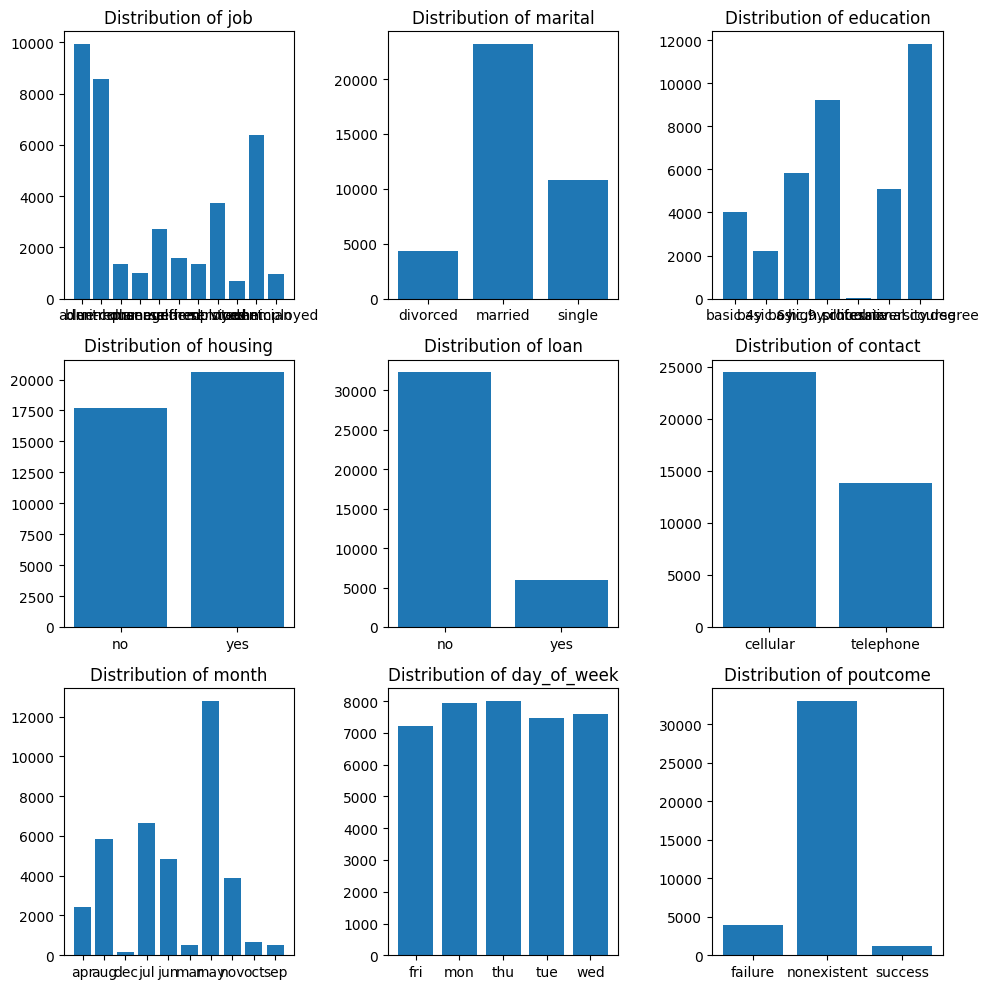

In [186]:
# Plotting the distribution og categorical columns
fig, ax = plt.subplots(3,3, figsize=(10,10))
index = 0
for i in range(3):
  for j in range(3):
    t = bnkA.groupby(catVar[index], as_index=False)['age'].count() # Getting the counts
    ax[i,j].bar(t[catVar[index]],t['age']) #plotting the bar plots
    ax[i,j].set_title("Distribution of "+str(catVar[index])) # settingg the title
    # ax[i,j].set_xlabel('Bins')
    index = index + 1
plt.tight_layout()
plt.show()

In [187]:
# Label Encoding - for categorical variables
enc = LabelEncoder()

In [188]:
 # creating a copy
bnkCheck = bnkA.copy()

In [189]:
bnkCheck['y'] = enc.fit_transform(bnkCheck['y']) 

In [190]:
# Using encoder to convert categorical columns to binary columns
oneEnc = pd.get_dummies(bnkCheck[['poutcome','marital','education']])
dfEnc = pd.concat([bnkCheck,oneEnc],axis=1)
dfEnc.drop(['poutcome','marital','education','job'],axis=1,inplace=True)

In [191]:
catVar2 = dfEnc.columns[dfEnc.dtypes == 'object'].tolist() 

In [192]:
for i in catVar2:
  dfEnc[i] = enc.fit_transform(dfEnc[i])

In [193]:
dfEnc.drop(['day_of_week','month','duration'],axis=1,inplace=True)

In [194]:
dfEnc.head(10)

,age,housing,loan,contact,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,poutcome_failure,poutcome_nonexistent,poutcome_success,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,57,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,37,1,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,40,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,56,0,1,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
5,45,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
6,59,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
8,24,1,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
9,25,1,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
11,25,1,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0


<ipython-input-195-0fe824893c5b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bnkCheck.corr(),annot=True,cmap='Reds')


<Axes: >

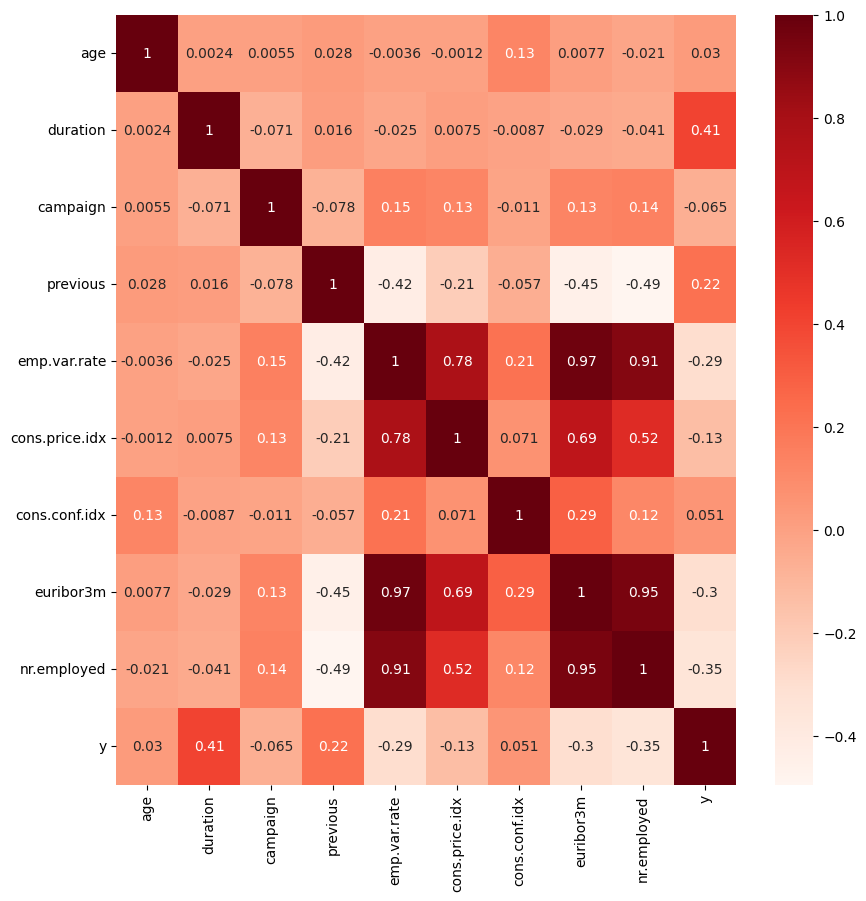

In [195]:
# Correlation heatmap
fig, hm = plt.subplots(figsize=(10,10))
sns.heatmap(bnkCheck.corr(),annot=True,cmap='Reds')

In [196]:
# Getting a correlation matrix and getting all the columns which have 100% correlated with other
corMat = bnkCheck.corr().abs() # getting the correlation matrix
upper = corMat.where(np.triu(np.ones(corMat.shape), k=1).astype(np.bool)) # making the lower traingle null
dropCol = [i for i in upper.columns if any(upper[i] >= 0.9)] # getting one of the columns to drop if they are same

<ipython-input-196-efea31e4fd5a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corMat = bnkCheck.corr().abs() # getting the correlation matrix
<ipython-input-196-efea31e4fd5a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corMat.where(np.triu(np.ones(corMat.shape), k=1).astype(np.bool)) # making the lower traingle null


In [197]:
dropCol

['euribor3m', 'nr.employed']

In [198]:
dropCol = dropCol + ['duration']

In [199]:
bnkA = bnkA.drop(dropCol, axis = 1)

In [200]:
dfEnc

,age,housing,loan,contact,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,poutcome_failure,poutcome_nonexistent,poutcome_success,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,57,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,37,1,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,40,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,56,0,1,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,1,0,0,1,0,0,0,0,0,0,1,0
41184,46,0,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,1,0,0,0,0,0,0,1,0
41185,56,1,0,0,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,1,0,0,0,0,0,0,0,1
41186,44,0,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,1,0,0,1,0,0,0,0,0,0,1,0


Building Models

In [201]:
# Importing the neccesary libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [202]:
X = dfEnc.drop(['y'],axis=1)
y = dfEnc['y'].values.reshape(-1, 1)

In [203]:
xTrain,xTest,yTrain,yTest = train_test_split(X,y,test_size=0.25,random_state=32)

Decision Tree

In [204]:
# Importing decision tree modules
from sklearn.model_selection import GridSearchCV

In [205]:
dTr = DecisionTreeClassifier(min_samples_leaf=2,max_leaf_nodes=8,max_depth=3)

In [206]:
dTr.fit(xTrain,yTrain)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, min_samples_leaf=2)

In [207]:
yPred1 = dTr.predict(xTest)

In [208]:
#Getting Accuracy, Precision, Recall
acc1 = accuracy_score(yTest,yPred1)
pre1 = precision_score(yTest,yPred1)
rec1 = recall_score(yTest,yPred1)
print(f"ACCURACY for Decision Trees:{acc1:.3f}")
print(f"PRECISION :{pre1:.3f} and RECALL : {rec1:.3f}")

ACCURACY for Decision Trees:0.902
PRECISION :0.745 and RECALL : 0.187


In [209]:
# Root Mean Squared Error (RMSE)
rmse1 = np.sqrt(mean_squared_error(yTest,yPred1))
print(f"RMSE for Decision Trees model: {rmse1:.3f}")

# Mean Absolute Error (MAE)
mae1 = mean_absolute_error(yTest,yPred1)
print(f"MAE for Decision Trees model: {mae1:.3f}")

RMSE for Decision Trees model: 0.313
MAE for Decision Trees model: 0.098


In [210]:
# Getting the confusion matrix
confMat1 = confusion_matrix(yTest,yPred1)
confMat1

array([[8428,   68],
       [ 867,  199]])

In [211]:
confMat1od = confMat1.ravel()

In [212]:
confMat1od_str = [f'{count:.0f}' for count in confMat1od]

In [213]:
confMat_dec = np.array(confMat1od_str).reshape((2, 2))

In [214]:
xLbls = ['True Negative', 'False Positive']
yLbls = ['True Positive', 'False Negative']

<Axes: >

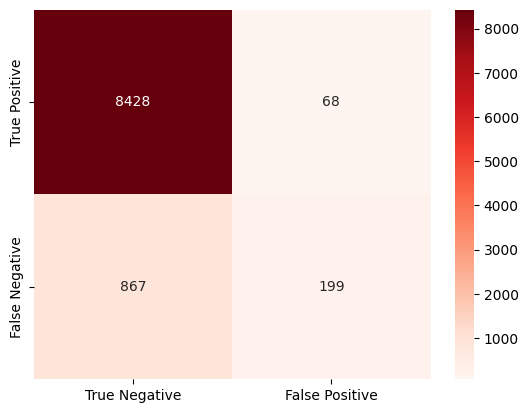

In [215]:
sns.heatmap(confMat1, annot=confMat_dec, fmt='', cmap='Reds', xticklabels=xLbls, yticklabels=yLbls)

Logistic Regression

In [216]:
# Importing Logistic Regression Modules
logReg = LogisticRegression()

In [217]:
logReg.fit(xTrain,yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [218]:
yPred2 = logReg.predict(xTest)

In [219]:
#Getting Accuracy, Precision, Recall
acc2 = accuracy_score(yTest,yPred2)
pre2 = precision_score(yTest,yPred2)
rec2 = recall_score(yTest,yPred2)
print(f"ACCURACY for Logistic Regression:{acc2:.3f}")
print(f"PRECISION :{pre2:.3f} and RECALL : {rec2:.3f}")

ACCURACY for Logistic Regression:0.894
PRECISION :0.552 and RECALL : 0.241


In [220]:
# Root Mean Squared Error (RMSE)
rmse2 = np.sqrt(mean_squared_error(yTest,yPred2))
print(f"RMSE for Logistic Regression model: {rmse2:.3f}")

# Mean Absolute Error (MAE)
mae2 = mean_absolute_error(yTest,yPred2)
print(f"MAE for Logistic Regression model: {mae2:.3f}")

RMSE for Logistic Regression model: 0.326
MAE for Logistic Regression model: 0.106


In [221]:
# Getting the confusion matrix
confMat2 = confusion_matrix(yTest,yPred2)
confMat2

array([[8287,  209],
       [ 809,  257]])

In [222]:
confMat2od = confMat2.ravel()

In [223]:
confMat2od_str = [f'{count:.0f}' for count in confMat2od]

In [224]:
confMat_dec = np.array(confMat2od_str).reshape((2, 2))

In [225]:
xLbls = ['True Negative', 'False Positive']
yLbls = ['True Positive', 'False Negative']

<Axes: >

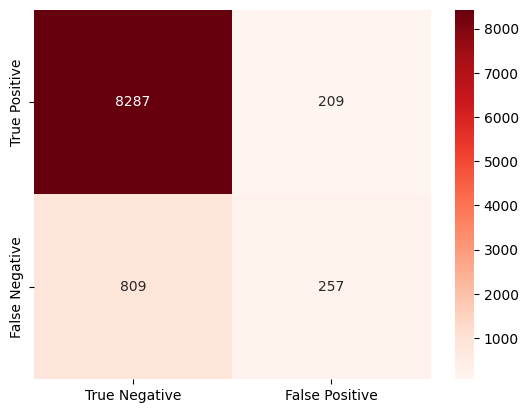

In [226]:
sns.heatmap(confMat1, annot=confMat_dec, fmt='', cmap='Reds', xticklabels=xLbls, yticklabels=yLbls)

Support Vector Machine

In [227]:
# Importing Support Vector Machine modules
supVecMac = SVC(kernel='linear')

In [228]:
supVecMac.fit(xTrain,yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [229]:
yPred3 = supVecMac.predict(xTest)

In [230]:
#Getting Accuracy, Precision, Recall
acc3 = accuracy_score(yTest,yPred3)
pre3 = precision_score(yTest,yPred3)
rec3 = recall_score(yTest,yPred3)
print(f"ACCURACY for Support Vector Machine:{acc3:.3f}")
print(f"Precision :{pre3:.3f} and Recall : {rec3:.3f}")

ACCURACY for Support Vector Machine:0.898
Precision :0.711 and Recall : 0.136


In [231]:
# Root Mean Squared Error (RMSE)
rmse3 = np.sqrt(mean_squared_error(yTest,yPred3))
print(f"RMSE for Logistic Regression model: {rmse3:.3f}")

# Mean Absolute Error (MAE)
mae3 = mean_absolute_error(yTest,yPred3)
print(f"MAE for Logistic Regression model: {mae3:.3f}")

RMSE for Logistic Regression model: 0.320
MAE for Logistic Regression model: 0.102


In [232]:
# Getting the confusion matrix
confMat3 = confusion_matrix(yTest,yPred3)
confMat3

array([[8437,   59],
       [ 921,  145]])

In [233]:
confMat3od = confMat3.ravel()

In [234]:
confMat3od_str = [f'{count:.0f}' for count in confMat3od]

In [235]:
confMat_dec = np.array(confMat3od_str).reshape((2, 2))

In [236]:
xLbls = ['True Negative', 'False Positive']
yLbls = ['True Positive', 'False Negative']

<Axes: >

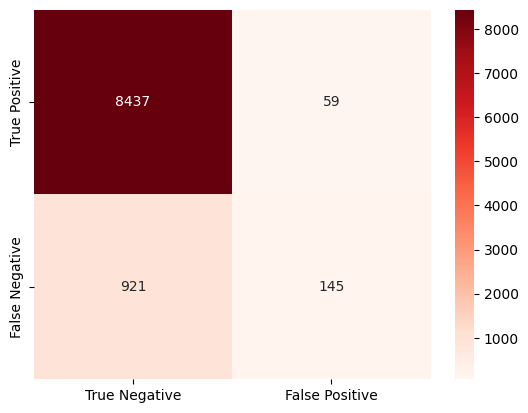

In [237]:
sns.heatmap(confMat3, annot=confMat_dec, fmt='', cmap='Reds', xticklabels=xLbls, yticklabels=yLbls)

In [238]:
models = [dTr, logReg, supVecMac]

In [239]:
yPred = [yPred1,yPred2, yPred3]
model= ['Decision Tree Classifier','Logistic Regression','SVM']

[0.         0.00800377 1.        ] [0.         0.18667917 1.        ]
[0.         0.02459981 1.        ] [0.         0.24108818 1.        ]
[0.         0.00694444 1.        ] [0.         0.13602251 1.        ]


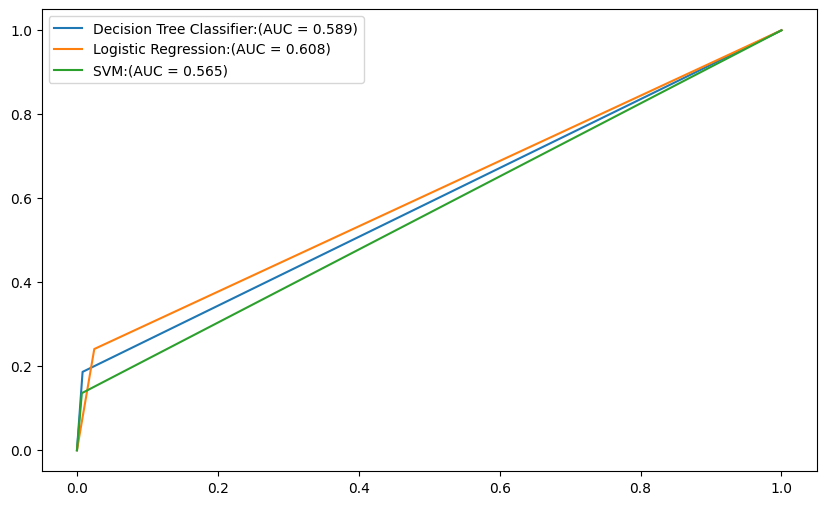

In [240]:
plt.figure(figsize=(10,6))
for i in range(0,3):
  yPred2 = yPred[i]
  model2 = model[i]
  fpr,tpr,threshold = metrics.roc_curve(yTest,yPred2)
  auc = metrics.auc(fpr,tpr)
  print(fpr,tpr)
  plt.plot(fpr, tpr, label=f"{model2}:(AUC = {auc:.3f})")
plt.legend()

In [241]:
Accuracy = [acc1,acc2,acc3]
Precision = [pre1,pre2,pre3]
recall = [rec1,rec2,rec3]

model= ['Decision Tree Classifier','Logistic Regression','SVM']

data = {'Models': model, 'Accuracy': Accuracy, 'Precision': Precision, 'Recall': recall}
df = pd.DataFrame(data)

df

,Models,Accuracy,Precision,Recall
0,Decision Tree Classifier,0.902217,0.745318,0.186679
1,Logistic Regression,0.893537,0.551502,0.241088
2,SVM,0.897511,0.710784,0.136023
